# Distribuição Normal Multivariada

In [1]:
import numpy as np
from scipy import stats

## Questão 1.

Num jogo digital, mamonas assassinas movem-se na tela ao acaso. Cada mamona movimenta-se de acordo com um modelo probabilístico próprio para não tornar o jogo monótono.
O movimento de cada uma delas é muito simples: a cada instante t (em frações de segundo), ela
movimenta-se de acordo com uma v.a. Zt ∼ N(1, 1) na direção norte-sul e de acordo com uma v.a.
Wt ∼ N(0, 1/16) na direção leste-oeste. As v.a.s Zt e Wt são independentes entre si. Além disso,
Z1, Z2, . . . são independentes bem como W1, W2, . . ..

* Simule o movimento de uma mamona assassina por 50 instantes de tempo. Repita a simulação
algumas vezes para ter uma ideia do tipo de movimento que a mamona assassina faz. Quais
as principais características qualitativas da sua movimentação?

* Dado que a manona assassina está numa posição (x, y) num certo instante de tempo, qual a
distribuição de probabilidade de sua posição um, dois e tres passos a frente?

* Dado que a mamona estava na posição (x, y) num certo instante, determine um retângulo R
no plano que tenha eixos paralelos ao sistema de coordenadas e tal que, com probabilidade
95%, a mamona esteja dentro de R

* Usando o teorema do limite central, qual é a distribuição de probabilidade aproximada da
localização de uma mamona assassina se ela partiu da origem (0, 0)?

In [2]:
def simulate_movement(T):
    x = 0
    y = 0
    for t in range(T):
        print(f'Posição no tempo {t}: ({x}, {y})')
        x += np.random.normal(0, 1/16)
        y += np.random.normal(1, 1)

simulate_movement(50)

Posição no tempo 0: (0, 0)
Posição no tempo 1: (0.07128093255311896, 2.7023714757505815)
Posição no tempo 2: (0.10259151458429656, 4.483682916088843)
Posição no tempo 3: (0.10993484310606927, 4.860207736009769)
Posição no tempo 4: (0.12738439326775292, 6.205912609616511)
Posição no tempo 5: (0.0510296425453268, 8.189100396876238)
Posição no tempo 6: (0.1446906394752165, 9.460751205435969)
Posição no tempo 7: (0.12459497924315456, 11.128165084617809)
Posição no tempo 8: (0.12736922260595382, 13.073945712743784)
Posição no tempo 9: (0.11984960076534547, 14.540604348968767)
Posição no tempo 10: (0.1202091914011189, 16.16290905321165)
Posição no tempo 11: (0.12545290510853555, 18.2271028526547)
Posição no tempo 12: (0.10377947740790319, 18.73662180114799)
Posição no tempo 13: (0.10116851571480133, 17.91812140527212)
Posição no tempo 14: (0.14787910600477921, 17.638186450139354)
Posição no tempo 15: (0.018188608801029127, 18.22513116809698)
Posição no tempo 16: (0.13594084335733242, 19.2316

É possível perceber que a mamona se movimenta bastante no sentido Norte (poucas são as vezes em que o valor dessa coordenada diminui). Já no sentido leste-oeste, a mamona tende a se movimentar pouco, variando o movimento ao redor da coordenada 0.

Dado uma posição (x, y), a posição após 1 passo é dada por (x + X, y + Y), onde X segue uma distribuição normal (0, 1/16) e Y segue uma distribuição normal (1, 1). Portanto, a distribuição após 1 passo é dada por uma Normal bivariada com médias (x, y) + (0, 1) e uma matriz de covariância diagonal igual a (1/16, 1).

Para obter a distribuição após 2 passos, é média é dada multiplicando as médias das Normais por 2 e somando pelo ponto inicial (x, y) + (0, 2). A matriz de covariância diagonal também é multiplicada por 2: (1/8, 2).

Para obter o retângulo que contém uma mamona após um passo saindo de (x, y) com 95% de probabilidade:

In [3]:
percentil = stats.norm.ppf(0.95)
percentil

1.6448536269514722

In [4]:
limite_x = percentil * 1/16 # desvio padrão de x
limite_y = percentil * 1 # desvio padrão de y

In [5]:
# Para obter o retângulo, basta subtrair/somar os limites da média,
# onde média = (x+0, y+1) para 1 passo saindo de (x, y)
print(f'O retângulo é obtido por [x - {limite_x}, x + {limite_x}], [y + 1 - {limite_y}, y + 1 + {limite_y}]')

O retângulo é obtido por [x - 0.10280335168446701, x + 0.10280335168446701], [y + 1 - 1.6448536269514722, y + 1 + 1.6448536269514722]


Por exemplo, se a mamona sai do ponto (x, y) = (0, 0), o retângulo é definido por:

In [6]:
print(f'[{0 - limite_x}, {0 + limite_x}], [{0 + 1 - limite_y}, {0 + 1 +limite_y}]')

[-0.10280335168446701, 0.10280335168446701], [-0.6448536269514722, 2.6448536269514724]


# Questão 2.

Considere o conjunto de dados iris. Os dados em setosa são uma amostra de exemplos do vetor aleatório X = (X1, X2, X3, X4) para
a espécie setosa. X1 é o Sepal Length, X2 é o Sepal Width, X3 é o Petal Length e X4 é o Petal
Width. Assuma que a distribuição conjunta do vetor X é uma normal multivariada de dimensão 4
com parâmetros µ = (µ1, µ2, µ3, µ4) e matriz de covariância Σ de dimensão 4×4. Use os resultados
obtidos no R (e apenas DUAS casas decimais) para responder às seguintes questões:

* Forneça uma estimativa para o vetor µ e para a matriz Σ.
* A partir da matriz de correlações entre os pares de v.a.’s (e do plot de dispersão dos pontos),
quais os grupos que são mais correlacionados?
* Obtenha a distribuição do sub-vetor X∗ = (X1, X3).
* Obtenha a distribuição CONDICIONAL do sub-vetor X∗ = (X1, X3) quando são conhecidos
os valores de (X2, X4).
* Obtenha agora distribuição CONDICIONAL do sub-vetor X∗ = (X1, X3) quando é conhecido
apenas o valor de X2.
* Obtenha também distribuição CONDICIONAL do sub-vetor X∗ = (X1, X3) quando é conhecido apenas o valor de X4.
* Comparando as três últimas respostas que você forneceu, qual das duas variáveis isoladamente,
X2 ou X4, diminui mais a incerteza acerca de X3? Isto é, se você tivesse de escolher apenas
uma delas, X2 ou X4, qual você iria preferir se seu objetivo fosse predizer o valor de X3? A
resposta é a mesma se o objetyivo for predizer X1?
* Considere a melhor preditora para X3 que você escolheu, dentre X2 ou X4, na questão anterior. Digamos que tenha sido X4. Avalie quanto conhecer a outra variável (neste caso,
X2) reduz ADICIONALMENTE a incerteza acerca de X3. Isto é, compare Var(X3|X4) com
Var(X3|X2, X4).

In [7]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import pandas as pd

In [8]:
data = load_iris()
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target
df['species'] = df['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


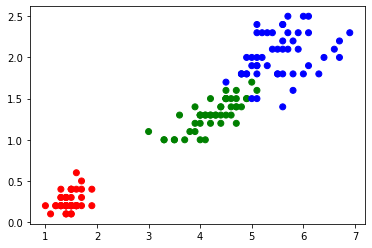

In [10]:
cores = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
cores_classes = df['species'].map(cores)

plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=cores_classes)
plt.show()

In [12]:
setosa = df[df['species'] == 'setosa']
setosa = setosa.drop('species', axis=1)
setosa.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
X1 = setosa['sepal length (cm)']
X2 = setosa['sepal width (cm)']
X3 = setosa['petal length (cm)']
X4 = setosa['petal width (cm)']

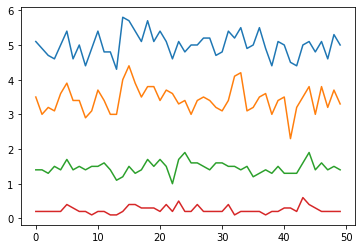

In [16]:
plt.plot(setosa)
plt.show()

In [17]:
mu = setosa.mean().to_numpy()
mu

array([5.006, 3.428, 1.462, 0.246])

In [18]:
cov = setosa.cov()
cov

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.124249,0.099216,0.016355,0.010331
sepal width (cm),0.099216,0.143690,0.011698,0.009298
petal length (cm),0.016355,0.011698,0.030159,0.006069
petal width (cm),0.010331,0.009298,0.006069,0.011106


In [19]:
cov = cov.to_numpy()
cov

array([[0.12424898, 0.09921633, 0.0163551 , 0.01033061],
       [0.09921633, 0.1436898 , 0.01169796, 0.00929796],
       [0.0163551 , 0.01169796, 0.03015918, 0.00606939],
       [0.01033061, 0.00929796, 0.00606939, 0.01110612]])

In [20]:
corr = setosa.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.742547,0.267176,0.278098
sepal width (cm),0.742547,1.000000,0.177700,0.232752
petal length (cm),0.267176,0.177700,1.000000,0.331630
petal width (cm),0.278098,0.232752,0.331630,1.000000


Pela matriz de correlação, é possível perceber que o par sepal length e sepal width estão bastante correlacionaodos (p = 0.74). A segunda maior correlação é entre petal length e petal width (p = 0.33)

A distribuição do sub-vetor (X1, X3) é uma Normal bivariada com $\mu = (5.006, 1.462)$ e 
$\Sigma=\begin{pmatrix}
0.12424898 & 0.0163551 \\
0.0163551 & 0.03015918
\end{pmatrix}$ 

Para obter a distribuição condicional de (X1, X3) dado (X2, X4):

$$
\mu = 
\begin{pmatrix}
5.006 \\
1.462 
\end{pmatrix}
+
\begin{pmatrix}
0.09921633 & 0.01033061\\
0.01169796 & 0.00606939
\end{pmatrix}
\begin{pmatrix}
7.35804761 & -6.16010013\\ 
-6.16010013 & 95.19761415
\end{pmatrix}
\begin{pmatrix}
x2 -  3.428\\
x4 -  0.246
\end{pmatrix}
$$

$$
\sigma = 
\begin{pmatrix}
0.12424898 & 0.0163551\\
0.0163551 & 0.03015918
\end{pmatrix}
-
\begin{pmatrix}
0.09921633 & 0.01033061\\
0.01169796 & 0.00606939
\end{pmatrix}
\begin{pmatrix}
7.35804761 & -6.16010013\\ 
-6.16010013 & 95.19761415
\end{pmatrix}
\begin{pmatrix}
0.09921633 & 0.01169796\\
0.01033061 & 0.00606939
\end{pmatrix}
$$

In [21]:
idx13 = [0, 2]
idx24 = [1, 3]

cov13 = cov[np.ix_(idx13, idx13)]
cov13

array([[0.12424898, 0.0163551 ],
       [0.0163551 , 0.03015918]])

In [22]:
cov24 = cov[np.ix_(idx24, idx24)]
cov24

array([[0.1436898 , 0.00929796],
       [0.00929796, 0.01110612]])

In [23]:
cov_cond = cov[np.ix_(idx13, idx24)]
cov_cond

array([[0.09921633, 0.01033061],
       [0.01169796, 0.00606939]])

In [25]:
cov_cond_2 = cov[np.ix_(idx24, idx13)]
cov_cond_2

array([[0.09921633, 0.01169796],
       [0.01033061, 0.00606939]])

In [24]:
np.linalg.inv(cov24)

array([[ 7.35804761, -6.16010013],
       [-6.16010013, 95.19761415]])

## Questão 3.

Seja Z = (Z1, Z2, Z3) um vetor de variáveis i.i.d. (independentes e identicamente distribuídas)
N(0, 1). Isto é, Z segue uma distribuição normal multivariada com valor esperado esperado (0, 0, 0)
e matriz 3 × 3 de covariância igual à identidade I. Você aprendeu a gerar estas v.a.’s na lista
anterior.
Queremos agora gerar um vetor aleatório X = (X1, X2, X3) seguindo uma normal multivariada com
valor esperado µ = (µ1, µ2, µ3) = (10, 20, -50) e com matriz de covariância $\Sigma$

$$\begin{matrix}
4&9&-14\\
9&30&-44\\
-14&-44&94\\
\end{matrix}$$


Para isto, siga os seguintes passos:

* Encontre uma matriz L tal que $LL^{t} = \Sigma$. Uma matriz com esta propriedade é aquela obtida
pela decomposição de Cholesky de matrizes simétricas e definidas positivas. Em R, isto é
obtido pelo comando L = t(chol(Sigma)).
* Gere z, um vetor 3-dim com v.a.’s iid N(0, 1).
* A seguir, faça
x = mu + L * z

Gere uma amostra de tamanho 2000 dos vetores x 3-dim e armazene numa matriz amostra de
dimensão 2000 × 3. A seguir, calcule a média aritmética dos 2000 valores de cada coordenada de x
e compare com os três valores do vetor µ. Eles devem ser parecidos.

Usando a amostra, estime os 9 valores da matriz de covariância $\Sigma$. Chame esta matriz estimada
de S. Verifique que as estimativas são próximas dos valores verdadeiros que você usou para gerar
seus dados. Por exemplo, estime o elemento $\sigma_{12}$ da matriz $\Sigma$ por 

$$
s_{12} = \frac{1}{2000} \sum_{i=1}^{2000}(x_{i1} - \overline{x}_{1}) (x_{i2} - \overline{x}_{2})$$


onde $\overline{x}_{1}$ e $\overline{x}_{2}$ são as médias aritméticas dos 2000 valores observados das v.a.’s 1 e 2. Os termos $\sigma_{jj}$ da diagonal principal são estimados por

$$
s_{jj} = \frac{1}{2000} \sum_{i=1}^{2000}(x_{ij} - \overline{x}_{j})^2
$$

O comando cov(x) calcula a matriz S diretamente (usando 1999 no denominador, ao invés de
2000). Procure calcular você os termos da matriz S para ter certeza de que você está entendendo
o que estamos fazendo.

In [27]:
sigma = np.array([[4, 9, -14], [9, 30, -44], [-14, -44, 94]])
sigma

array([[  4,   9, -14],
       [  9,  30, -44],
       [-14, -44,  94]])

In [30]:
mu = np.array([10, 20, -50])
mu

array([ 10,  20, -50])

In [28]:
L = np.linalg.cholesky(sigma)
L

array([[ 2.        ,  0.        ,  0.        ],
       [ 4.5       ,  3.122499  ,  0.        ],
       [-7.        , -4.00320385,  5.38278357]])

In [29]:
z1 = np.random.normal()
z2 = np.random.normal()
z3 = np.random.normal()
z = [z1, z2, z3]
z

[-1.2803743629039557, -1.0418185183058095, -0.04484730816451373]

In [43]:
Z = np.zeros((2000, 3))
for i in range(2000):
    z = np.random.normal(size=3)
    x = mu + L.dot(z)
    Z[i, :] = x
Z

array([[  9.58933649,  21.99507468, -58.00588749],
       [ 14.44696724,  29.90961812, -63.17812904],
       [ 11.5759695 ,  24.96173508, -52.18911019],
       ...,
       [ 11.16596142,  18.65971535, -55.16487334],
       [  6.14128189,   8.49227965, -29.69754505],
       [  6.56399943,  11.17344231, -35.37110786]])

Percebe-se que as médias obtidas são similares.

In [45]:
print(f'mu = ({np.mean(Z[:,0])}, {np.mean(Z[:,1])}, {np.mean(Z[:,2])})')

mu = (10.040001016248024, 20.127472775249416, -50.195755129368365)


In [46]:
S = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        mui = np.mean(Z[:, i])
        muj = np.mean(Z[:, j])
        soma = np.sum((Z[:, i] - mui) * (Z[:, j] - muj))
        S[i][j] = soma / 2000
S

array([[  4.16099843,   9.14296378, -14.15141508],
       [  9.14296378,  29.63469401, -42.42932652],
       [-14.15141508, -42.42932652,  89.48203604]])

## Questão 4.

 Usando a distribuição de X do problema anterior, seja b um vetor k-dimensional e C uma matriz
k × 3 formada por constantes. Uma das propriedades da normal multivariada é que a distribuição
do vetor b + CX de dimensão k é normal com vetor de médias b + C$\mu$ e matriz de k×k covariância
$C\Sigma C^{t}$
. Use esta propriedade para obter a distribuição das seguintes variáveis:

* Distribuição marginal de $X_{1}$, de $X_{2}$ e de $X_{3}$.
* Distribuição de um indicador composto pelas 3 variáveis: $T = 0.4X_{1} + 0.3X_{2} + 0.3X_{3}$.
* Distribuição de um indicador composto pelas 3 variáveis normalizadas: $T = 0.4(X_{1} − 10)/2 + 0.3(X_{2} − 20)/ \sqrt{30} + 0.3(X_{3} + 50)/ \sqrt{94}$
* Distribuição conjunta de $(X_{1} − X_{2}, 4X_{1} + 2X_{2} − X_{3})$.
* Distribuição conjunta de $(X_{1}, aX_{1} + bX_{2} + cX_{3})$. onde a, b, c são constantes reais. Em particular, encontre a covariância entre X1 e o indicador $Y = aX_{1} + bX_{2} + cX_{3}$ formado pela
combinação linear de $X_{1}$, $X_{2}$ e $X_{3}$.


1. $X_{1}$ = N(10, 4)
$X_{2}$ = N(20, 30)
$X_{3}$ = N(-50, 94)

2. $\mu = (0.4, 0.3, 0.3) * (10, 20, -50) = -5$

    $\sigma = (0.4, 0.3, 0.3) * \Sigma * (0.4, 0.3, 0.3) = 2.68$
    
    $T = N(-5, 2.68)$
    
3. Basta aplicar o mesmo raciocínio, onde $b = (-2, \frac{-6}{\sqrt{30}}, \frac{15}{\sqrt{94}})$ e $C = (0.2, \frac{0.3}{\sqrt{30}}, \frac{0.3}{\sqrt{94}})$

In [47]:
C = np.array([0.4, 0.3, 0.3])
res = C.dot(sigma).dot(np.transpose(C))
res

2.6799999999999993